Epoch 1/100


C:\Users\alire\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2889 - loss: 1.1174 - val_accuracy: 0.3333 - val_loss: 1.1063
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5519 - loss: 1.0591 - val_accuracy: 0.6667 - val_loss: 1.0526
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6881 - loss: 0.9936 - val_accuracy: 0.6667 - val_loss: 1.0051
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7838 - loss: 0.9452 - val_accuracy: 0.6667 - val_loss: 0.9682
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8227 - loss: 0.8947 - val_accuracy: 0.5833 - val_loss: 0.9378
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7338 - loss: 0.8623 - val_accuracy: 0.6667 - val_loss: 0.9125
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8144 - loss: 0.7904 - val_accuracy: 0.6667 - val_loss: 0.8922
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7546 - loss: 0.7885 - val_accuracy: 0.6667 - val_loss: 0.8757
Epoch 9/1

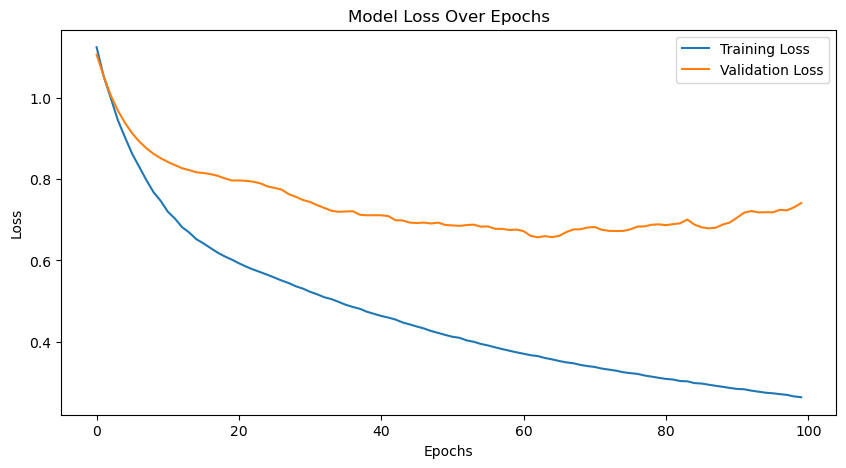

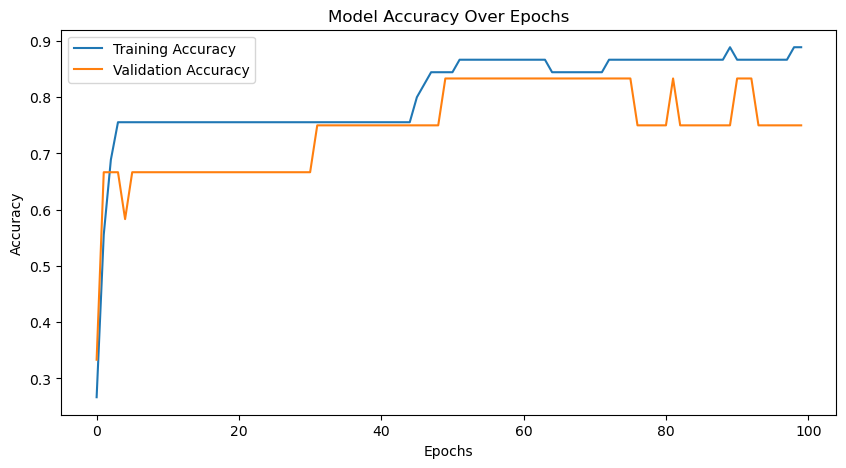


Enter new parameters to predict the class:


Enter Vorschub in mm/s:  16.67
Enter Leistung in kW:  1400
Enter Drahtvorschub in m/min:  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: Stubbing


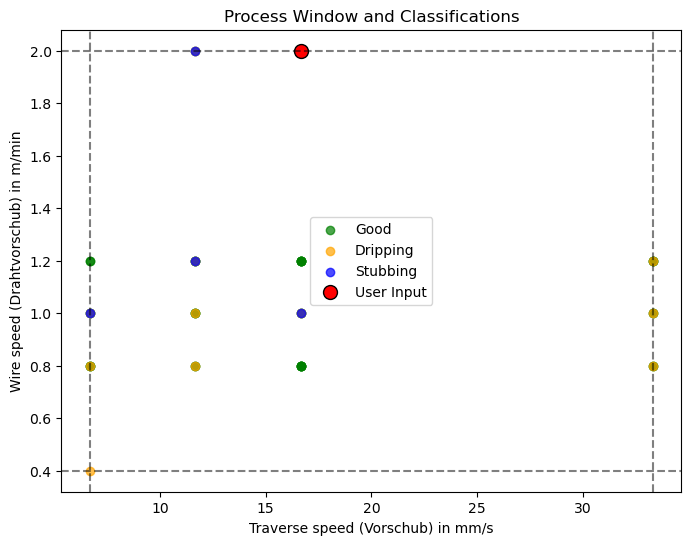

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"D:\Masterarbeit\code\one layer.xlsx"
data = pd.read_excel(file_path)

# Rename columns
data.columns = ["Vorschub", "Leistung", "Drahtvorschub", "Ergebniss"]

# Encode target labels
label_encoder = LabelEncoder()
data["Ergebniss"] = label_encoder.fit_transform(data["Ergebniss"])

# Define features and target
X = data[["Vorschub", "Leistung", "Drahtvorschub"]].values
y = data["Ergebniss"].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Take user input for new data
print("\nEnter new parameters to predict the class:")
vorschub = float(input("Enter Vorschub in mm/s: "))
leistung = float(input("Enter Leistung in kW: "))
drahtvorschub = float(input("Enter Drahtvorschub in m/min: "))

new_input = np.array([[vorschub, leistung, drahtvorschub]])
new_input_scaled = scaler.transform(new_input)

# Check if new input is within the process window
if (
    vorschub < data["Vorschub"].min() or vorschub > data["Vorschub"].max() or
    leistung < data["Leistung"].min() or leistung > data["Leistung"].max() or
    drahtvorschub < data["Drahtvorschub"].min() or drahtvorschub > data["Drahtvorschub"].max()
):
    print("Predicted class: Error (parameters out of range)")
else:
    prediction = model.predict(new_input_scaled)
    predicted_class = label_encoder.inverse_transform([np.argmax(prediction)])
    print(f"Predicted class: {predicted_class[0]}")

# Scatter plot for data visualization
fig, ax = plt.subplots(figsize=(8, 6))

# Define custom colors for classes
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
colors = {class_mapping['Good']: 'green', class_mapping['Dripping']: 'orange', class_mapping['Stubbing']: 'blue'}

# Plot original data
for class_label, color in colors.items():
    subset = data[data["Ergebniss"] == class_label]
    ax.scatter(subset["Vorschub"], subset["Drahtvorschub"], label=label_encoder.inverse_transform([class_label])[0], c=color, alpha=0.7)

# Highlight user input
ax.scatter(vorschub, drahtvorschub, color='red', s=100, label='User Input', edgecolor='black')

# Add process window boundaries
ax.axvline(x=data["Vorschub"].min(), color='black', linestyle='--', alpha=0.5)
ax.axvline(x=data["Vorschub"].max(), color='black', linestyle='--', alpha=0.5)
ax.axhline(y=data["Drahtvorschub"].min(), color='black', linestyle='--', alpha=0.5)
ax.axhline(y=data["Drahtvorschub"].max(), color='black', linestyle='--', alpha=0.5)

# Customize plot
ax.set_xlabel("Traverse speed (Vorschub) in mm/s")
ax.set_ylabel("Wire speed (Drahtvorschub) in m/min")
ax.set_title("Process Window and Classifications")
ax.legend()
plt.show()
